<a href="https://colab.research.google.com/github/SohelRaja/Consensus-and-Ensemble-Model/blob/main/Imbalanced%20Data%20with%20Same%20Ratio/EnsembleClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [2]:
datasetUrl = 'https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv'

In [3]:
colon = pd.read_csv(datasetUrl)

In [4]:
colon.head(5)

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.41

## Data Analysis

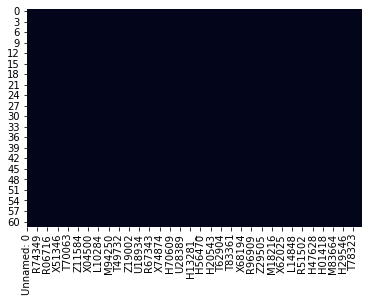

In [5]:
sns.heatmap(colon.isnull(),cbar=False)

In [6]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), object(1)
memory usage: 969.4+ KB


## Creating Two Different Dataframes

In [10]:
df['Class'].value_counts()

Abnormal    40
Normal      22
Name: Class, dtype: int64

In [36]:
df_majority = pd.DataFrame(columns=df.columns)
df_minority = pd.DataFrame(columns=df.columns)
majority_index, minority_index = 0, 0
for i in range(len(df)):
  if df.iloc[i]['Class'] == 'Abnormal':
    df_majority.loc[majority_index] = df.iloc[i]
    majority_index += 1
  else:
    df_minority.loc[minority_index] = df.iloc[i]
    minority_index += 1
print(df_majority.shape, df_minority.shape)

(40, 2001) (22, 2001)


In [37]:
df_majority

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.59880,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.01430,1135.82390,2365.24240,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.07120,3166.58000,930.3038,2018.35500,2065.59450,2065.59450,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.238100,64.71125,88.444440,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.110720,67.56125,259.91250,138.89874,88.23250,39.667860,67.82875,75.67750,83.52250,28.70125,Abnormal
1,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.85380,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.44290,734.52875,763.30750,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.62000,1378.12000,797.1925,1880.18750,1389.63020,1389.63020,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.111900,75.15500,122.413890,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,Abnormal
2,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.69630,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.98930,1903.58250,1568.11130,1368.8175,2648.2676,1073.41000,1207.4163,1201.7687,1733.82390,621.65000,1381.4825,719.45250,967.35760,967.35760,...,40.36000,22.07125,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.377380,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.464290,76.60375,161.35000,61.70125,54.56375,223.359530,73.09875,57.59875,7.48875,31.81250,Abnormal
3,7126.5986,3779.0680,3705.5537,6594.5140,2460.9048,3775.6821,2621.4187,2047.2812,6411.2676,3857.1190,1496.4062,1604.2615,1489.90500,1364.1700,2093.50120,3048.0790,1324.5413,1452.9150,2003.4838,2217.3400,3247.1390,3275.5664,3186.0576,1905.6438,1557.7375,3116.1953,925.72020,1644.27620,1902.57250,2218.7424,2194.0725,1298.09250,2604.6350,1743.8225,1068.41880,1901.38120,1749.7913,1746.84380,1033.70790,1033.70790,...,87.49750,277.92624,46.21875,73.46250,105.653570,11.93875,84.57125,37.15750,25.00500,141.43124,132.32375,27.303572,44.940475,73.33250,197.258330,48.70500,39.35375,36.76125,69.35250,36.950000,56.70625,77.884720,34.12250,24.34875,52.284210,36.623215,72.24625,53.30000,154.84125,147.804760,51.03250,80.19000,76.48500,98.53750,54.621430,30.54000,52.96125,37.23625,24.44500,Abnormal
4,9330.6790,7017.2295,4723.7827,9491.5340,5346.5415,1557.1430,1969.0800,2295.4026,6880.3460,6162.8930,7927.6523,2022.6731,1427.51250,3334.2850,5329.66400,1547.2167,4694.5800,2193.6938,1077.5350,1433.4100,4611.5550,9533.9350,4302.4536,10721.2980,2199.5405,6264.4927,1278.

In [38]:
df_minority

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.36250,2490.87380,3759.5850,4268.9185,4166.19140,4286.69000,2699.28440,2796.08330,1015.91430,1459.1025,2865.03880,1156.95630,1351.9650,3218.32130,3855.53370,3097.4539,1667.54250,2779.30370,1064.26750,2430.87900,2814.28000,2814.28000,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.538100,91.29500,86.036110,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.789290,92.23875,96.27625,150.59000,82.23750,85.033330,152.19500,186.56750,44.47250,16.77375,Normal
1,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.69120,1139.62740,2662.0974,2636.1562,3134.74760,4244.07000,1186.89380,2342.38200,792.21430,1133.2375,969.82370,835.38620,1392.7162,3034.57130,4699.39500,3312.4812,854.42880,1880.54000,1329.32250,3124.24880,2456.09300,2456.09300,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.445240,90.45500,140.830570,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.595250,41.68375,5.92500,183.00626,74.52875,67.710720,48.33875,42.52000,49.98250,16.08500,Normal
2,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,2289.0350,2162.2866,2070.0774,3466.7913,2137.41800,2716.3792,1497.1588,1586.2438,962.01000,1214.76750,904.7225,3970.4226,906.59625,1313.05880,1950.39060,1788.14640,1254.51550,1639.1475,819.18870,1454.76250,1227.4187,916.71250,576.78375,745.3400,994.61250,540.46875,1236.07620,422.65625,1374.15540,1374.15540,...,42.30250,26.41500,18.27000,16.17875,36.127380,213.55125,37.78250,29.52500,27.13875,74.56125,34.43875,16.604761,111.280950,61.57250,41.211110,39.77750,28.01250,23.72375,87.18000,6.088158,26.13000,18.765278,50.26000,24.35000,15.419737,13.553571,84.20625,47.47875,73.50500,122.533330,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375,Normal
3,4028.7100,3156.1592,2870.2550,4417.5913,1854.1060,2828.3037,1427.5262,3390.7063,4373.0440,3080.4512,5784.1210,2222.2078,2502.8100,3616.2460,1673.22620,4623.0790,1871.7600,3154.8286,1624.41130,1150.88500,1309.1838,3015.6390,1206.18750,1640.31500,2641.15000,1752.55360,1531.52860,2560.4424,1293.77620,3926.41750,1013.6188,786.10126,1077.68750,1956.6438,987.24380,749.75000,1259.82390,1215.65250,2276.83420,2276.83420,...,67.69750,63.61125,68.41250,19.34500,62.545240,382.57126,70.14375,21.97125,38.42750,111.66125,33.32250,48.369050,190.659520,45.42625,73.486115,71.57875,56.23500,14.12000,135.63875,45.438156,60.20625,6.072222,46.43875,54.94750,12.184211,38.391070,60.52750,14.93000,96.66000,116.194050,46.67375,172.78876,51.82375,97.85500,98.982140,24.19625,29.76625,44.37625,52.29000,Normal
4,5271.5176,4740.7680,3318.5137,6792.3480,2632.8894,5449.2070,4623.2124,3277.4038,4488.0600,3343.8108,3830.4250,3046.9463,8878.3090,5729.3213,2763.32250,5865.6580,1828.0662,3078.7437,3741.37000,4443.52000,2707.7550,5904.6025,1806.13870,3337.09

In [39]:
df_majority_X = df_majority.drop(['Class'],axis=1)
df_majority_y = df_majority['Class']

df_minority_X = df_minority.drop(['Class'],axis=1)
df_minority_y = df_minority['Class']

## Taking Dummy Values

In [75]:
df_majority_Y = pd.get_dummies(df_majority_y)

df_minority_Y = pd.get_dummies(df_minority_y,columns=['Normal'])

In [76]:
df_majority_Y.head(), df_minority_Y.head()

(   Abnormal
 0         1
 1         1
 2         1
 3         1
 4         1,    Normal
 0       1
 1       1
 2       1
 3       1
 4       1)

## Spliting of Training and testing dataset

In [42]:
from sklearn.model_selection import train_test_split

In [60]:
X_train_majority, X_test_majority, y_train_majority, y_test_majority = train_test_split(df_majority_X, df_majority_y, test_size=0.25, random_state=101)

In [61]:
X_train_minority, X_test_minority, y_train_minority, y_test_minority = train_test_split(df_minority_X, df_minority_y, test_size=0.25, random_state=101)

In [81]:
type(X_train_majority)

pandas.core.frame.DataFrame

In [96]:
X_train = pd.concat([X_train_majority, X_train_minority], axis=0)
X_test = pd.concat([X_test_majority, X_test_minority], axis=0)
y_train = pd.concat([y_train_majority, y_train_minority], axis=0)
y_test = pd.concat([y_test_majority, y_test_minority], axis=0)

In [91]:
X_train.columns

Index(['H55933', 'R39465', 'R39465_', 'R85482', 'U14973', 'R02593', 'T51496',
       'H80240', 'T65938', 'T55131',
       ...
       'X67699', 'R70790', 'L11706', 'T90549', 'D17390', 'M33210', 'H18490',
       'H40891', 'R77780', 'T49647'],
      dtype='object', length=2000)

In [92]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46, 2000) (16, 2000) (46,) (16,)


In [93]:
type(y_train)

pandas.core.series.Series

In [97]:
y_train = pd.Series(y_train, name="Abnormal")
y_test = pd.Series(y_test, name="Abnormal")

# Converting pandas series into dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [98]:
y_train['Abnormal'].replace(to_replace=[['Abnormal'],['Normal']],value=[1,0],inplace=True)
y_test['Abnormal'].replace(to_replace=[['Abnormal'],['Normal']],value=[1,0],inplace=True)

In [100]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46, 2000) (16, 2000) (46, 1) (16, 1)


## KNN Classification

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [101]:
K = 15
acc = np.zeros((K-1))
for k in range(1,K):
  clf_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred_knn = clf_knn.predict(X_test)
  acc[k-1] = metrics.accuracy_score(y_test,y_pred_knn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [102]:
print("The Best Accuracy is:",acc.max()*100,"% with k=",acc.argmax()+1)

The Best Accuracy is: 87.5 % with k= 1


In [108]:
knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_knn))

Accuracy :  0.875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [109]:
print("Train Accuracy :", knn_model.score(X_train, y_train), "Testing Accuracy :", knn_model.score(X_test, y_test))

Train Accuracy : 1.0 Testing Accuracy : 0.875


In [110]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_knn, average='macro'))
print(precision_score(y_test, y_pred_knn, average='micro'))
print(precision_score(y_test, y_pred_knn, average='weighted'))

0.9166666666666667
0.875
0.8958333333333334


## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

In [114]:
clf_logreg = LogisticRegression(max_iter=50, verbose=1, random_state=101)
clf_logreg.fit(X_train, y_train)
y_pred_logreg = clf_logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(clf_logreg.score(X_test,y_test)*100))
print("Train Accuracy :", clf_logreg.score(X_train,y_train), "Testing Accuracy :", clf_logreg.score(X_test, y_test))
print(precision_score(y_test, y_pred_logreg, average='macro'))
print(precision_score(y_test, y_pred_logreg, average='micro'))
print(precision_score(y_test, y_pred_logreg, average='weighted'))

Accuracy of logistic regression classifier on test set:81.25
Train Accuracy : 1.0 Testing Accuracy : 0.8125
0.8090909090909091
0.8125
0.8113636363636364


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)
print("Accuracy ",metrics.accuracy_score(y_test,y_pred_gnb)*100)
print("Train Accuracy :", clf_gnb.score(X_train,y_train), "Testing Accuracy :",clf_gnb.score(X_test,y_test))

Accuracy  62.5
Train Accuracy : 0.6956521739130435 Testing Accuracy : 0.625


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_gnb)
print(confusion_matrix)

[[5 1]
 [5 5]]


## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_dt_entropy.fit(X_train,y_train)
y_pred = clf_dt_entropy.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Decision Tree): ',dt_accuracy,'%')
print("Train Accuracy :", clf_dt_entropy.score(X_train,y_train), "Testing Accuracy :", clf_dt_entropy.score(X_test, y_test))

Accuracy(Decision Tree):  68.75 %
Train Accuracy : 1.0 Testing Accuracy : 0.6875


## SVM

In [119]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train,y_train)
y_pred_svm = clf_svm.predict(X_test)
svm_accuracy = round(metrics.accuracy_score(y_test,y_pred_svm)*100,2)
print('Accuracy(SVM): ',svm_accuracy,'%')
print("Train Accuracy :", clf_svm.score(X_train, y_train), "Testing Accuracy :", clf_svm.score(X_test, y_test))

Accuracy(SVM):  81.25 %
Train Accuracy : 0.9130434782608695 Testing Accuracy : 0.8125


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
